In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from PIL import Image
from torchvision import transforms
from torch import nn

In [ ]:
MNIST_dataset = torchvision.datasets.MNIST(root='data',
                          train=True,
                          download=True,
                          transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 35126013.20it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2341827.17it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11291066.92it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1599674.93it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
MNIST_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

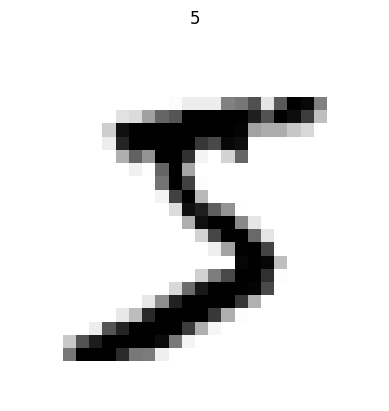

In [ ]:
plt.imshow(MNIST_dataset[0][0].permute(1, 2, 0), cmap='binary');
plt.axis(False);
plt.title(MNIST_dataset[0][1]);

In [ ]:
MNIST_data = torch.stack([i[0] for i in MNIST_dataset])
MNIST_labels = torch.Tensor([i[1] for i in MNIST_dataset])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MNIST_data, MNIST_labels, test_size=0.3, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([42000, 1, 28, 28]),
 torch.Size([18000, 1, 28, 28]),
 torch.Size([42000]),
 torch.Size([18000]))

In [ ]:
train_size = int(len(MNIST_dataset) * 0.7)
train_dataset = [MNIST_dataset[i] for i in range(train_size)]
test_dataset = [MNIST_dataset[i] for i in range(train_size, len(MNIST_dataset))]
len(train_dataset), type(train_dataset)
len(test_dataset), type(test_dataset)

(18000, list)

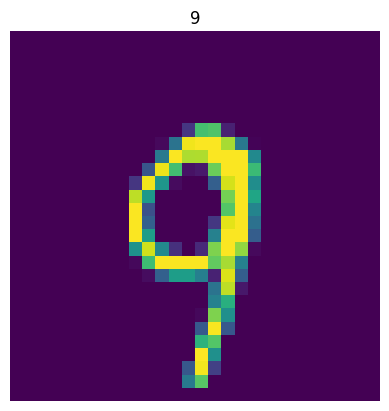

In [ ]:
img, lbl = X_test[1000], y_test[1000]
plt.imshow(img.permute(1, 2, 0));
plt.axis(False);
plt.title(lbl.type(torch.int).item());

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, 32, True)
test_dataloader = DataLoader(test_dataset, 32, True)
len(train_dataloader)

1313

In [ ]:
list(train_dataloader)[0]

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
class MNIST_LINEAR(nn.Module):
  def __init__(self):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 10)
    )

  def forward(self, x):
   return self.stack(x)
model_0 = MNIST_LINEAR()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [ ]:
class MNIST_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Conv2d(1, 8, 3, 1),
        nn.ReLU(),
        nn.Conv2d(8, 8, 3, 1),
        nn.Flatten(),
        nn.Linear(4608, 10)
    )

  def forward(self, x):
   return self.stack(x)
model_0 = MNIST_CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [ ]:
list(train_dataloader)[0][0][0].shape

torch.Size([1, 28, 28])

In [ ]:
model_0(list(train_dataloader)[0][0][0].unsqueeze(0))

tensor([[-0.1100,  0.0670, -0.0519, -0.0012,  0.0327, -0.0382, -0.1297, -0.0281,
         -0.0594, -0.1042]], grad_fn=<AddmmBackward0>)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from tqdm import tqdm
EPOCHS = 5
for epoch in tqdm(range(1, EPOCHS + 1)):
  print(f'\n--------{epoch}--------')
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    acc = accuracy_score(y, y_pred.argmax(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss
    train_acc += acc
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for batch, (X, y) in enumerate(test_dataloader):
      model_0.eval()
      y_pred = model_0(X)
      loss = loss_fn(y_pred, y)
      acc = accuracy_score(y, y_pred.argmax(1))
      test_loss += loss
      test_acc += acc
  print(f'TRAIN: acc - {train_acc * 100 / len(train_dataloader): 0.3f}% loss - {train_loss / len(train_dataloader): 0.5f}')
  print(f'TEST: acc - {test_acc * 100 / len(test_dataloader): 0.3f}% loss - {test_loss / len(test_dataloader): 0.5f}')

  0%|          | 0/5 [00:00<?, ?it/s]


--------1--------


 20%|██        | 1/5 [00:14<00:56, 14.07s/it]

TRAIN: acc -  93.531% loss -  0.21545
TEST: acc -  95.654% loss -  0.16084

--------2--------


 40%|████      | 2/5 [00:27<00:41, 13.86s/it]

TRAIN: acc -  96.301% loss -  0.13002
TEST: acc -  95.493% loss -  0.15125

--------3--------


 60%|██████    | 3/5 [00:41<00:27, 13.77s/it]

TRAIN: acc -  96.811% loss -  0.11529
TEST: acc -  96.609% loss -  0.16262

--------4--------


 80%|████████  | 4/5 [00:56<00:14, 14.22s/it]

TRAIN: acc -  96.939% loss -  0.11690
TEST: acc -  96.287% loss -  0.19166

--------5--------


100%|██████████| 5/5 [01:09<00:00, 13.96s/it]

TRAIN: acc -  97.025% loss -  0.12375
TEST: acc -  96.392% loss -  0.20166


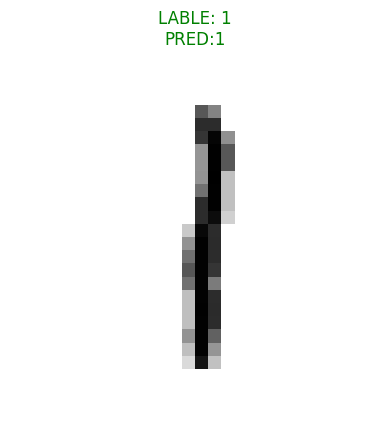

In [ ]:
import random
img, lbl = random.sample(test_dataset, 1)[0]
plt.imshow(img.permute(1, 2, 0), cmap='binary');
plt.axis(False);
pred = model_0(img.unsqueeze(0)).softmax(1).argmax(1)
if pred == lbl:
  plt.title(f'LABLE: {lbl}\nPRED:{pred.item()}', c='green')
else:
  plt.title(f'LABLE: {lbl}\nPRED:{pred.item()}', c='red')